Melakukan klasifikasi kelas selain 'mamalia' menggunakan data yang tersedia, kemudian:

In [63]:
import pandas as pd

data = pd.read_excel('vertebrate2.xlsx',header='infer')
data['Class'] = data['Class'].replace(['mammals','birds','amphibians','reptiles'],'non-fishes')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1.0,0,0,1,0,non-fishes
1,python,0,0.0,0,0,0,0,non-fishes
2,salmon,0,0.0,1,0,0,0,fishes
3,blue whale,1,1.0,1,0,0,0,non-fishes
4,tree frog,0,0.0,1,0,1,0,non-fishes
...,...,...,...,...,...,...,...,...
95,viper,0,0.0,0,0,0,0,non-fishes
96,grizzly bear,1,1.0,0,0,1,1,non-fishes
97,walrus,1,1.0,1,0,0,0,non-fishes
98,flamingo,1,0.0,0,1,1,0,non-fishes


##Prepocessing Data##

In [64]:
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())

['Gives Birth']
Name                0
Warm-blooded        0
Gives Birth         1
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64


In [65]:
import math
for i in range(len(data)):
  if math.isnan(data['Gives Birth'][i]) == True:
    if data['Class'][i] == 'non-fishes':
      data['Gives Birth'][i] = 0
    else:
      data['Gives Birth'][i] = 1

<ipython-input-65-41013a8fb33b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gives Birth'][i] = 1


In [67]:
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())

[]
Name                0
Warm-blooded        0
Gives Birth         0
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64


##Nomor 1 
Plot cabang klasifikasi menggunakan Decision Tree untuk beberapa max_depth dan berikan analisis.

In [68]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

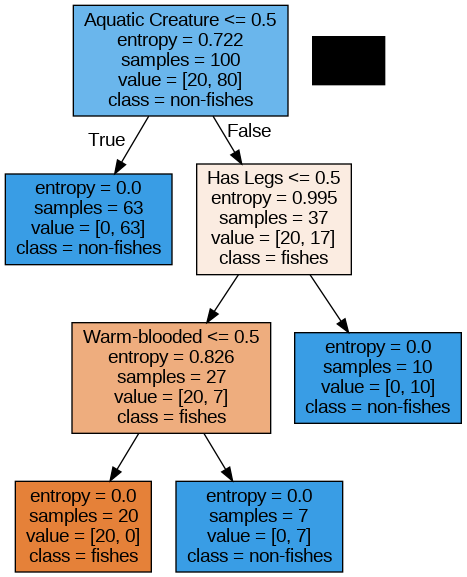

In [69]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['fishes','non-fishes'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [70]:
from sklearn.model_selection import train_test_split

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 6), (20, 6), (80,), (20,))

Text(0, 0.5, 'Accuracy')

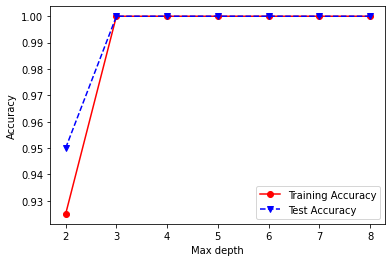

In [71]:
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


Dapat dianalisis bahwa untuk parameter max_depth = 3,4,5 dst., model tetap menghasilkan tree dengan kedalaman 3. Tree dengan kedalaman 3 sudah dapat menghasilkan akurasi 100%, terlihat dari jumlah data pada node terakhirnya yaitu [0, 80] untuk kelas 'non-fishes' dan [20, 0] untuk kelas 'fishes'. Sehingga model decision tree dapat memprediksi kelas secara akurat.

##Nomor 2 
Menggunakan berbagai metode ensemble, yaitu 'Random Forest', 'Bagging', dan 'AdaBoost'. Plot hasil akurasi dan confusion matrix untuk berbagai jumlah tree dan max_depth.

In [73]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

Ensemble methods dengan number of trees: 50  dan max_depth: 2
rf: [[11  0]
 [ 0 39]]
bagging: [[11  0]
 [ 0 39]]
boosting: [[11  0]
 [ 0 39]]


[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

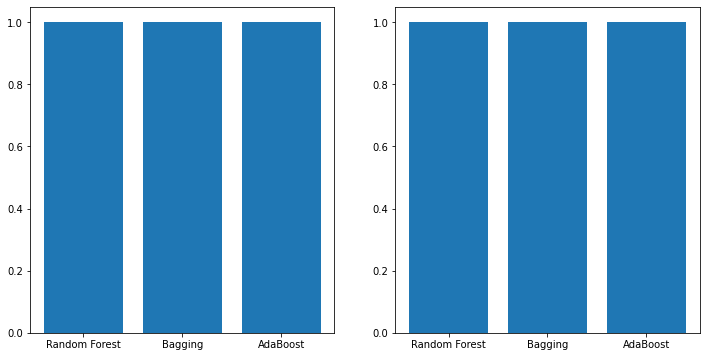

In [74]:
numBaseClassifiers = 50
maxdepth = 2
trainAcc = []
testAcc = []
print('Ensemble methods dengan number of trees:', numBaseClassifiers, ' dan max_depth:', maxdepth)
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('rf:', cf)

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('bagging:', cf)
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('boosting:', cf)
methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

Ensemble methods dengan number of trees: 200  dan max_depth: 5
rf: [[11  0]
 [ 0 39]]
bagging: [[11  0]
 [ 0 39]]
boosting: [[11  0]
 [ 0 39]]


[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

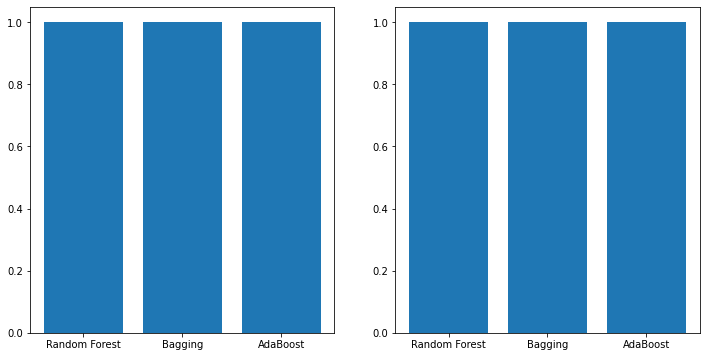

In [75]:
numBaseClassifiers = 200
maxdepth = 5
trainAcc = []
testAcc = []
print('Ensemble methods dengan number of trees:', numBaseClassifiers, ' dan max_depth:', maxdepth)
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('rf:', cf)

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('bagging:', cf)
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('boosting:', cf)
methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

Ensemble methods dengan number of trees: 500  dan max_depth: 10
rf: [[11  0]
 [ 0 39]]
bagging: [[11  0]
 [ 0 39]]
boosting: [[11  0]
 [ 0 39]]


[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

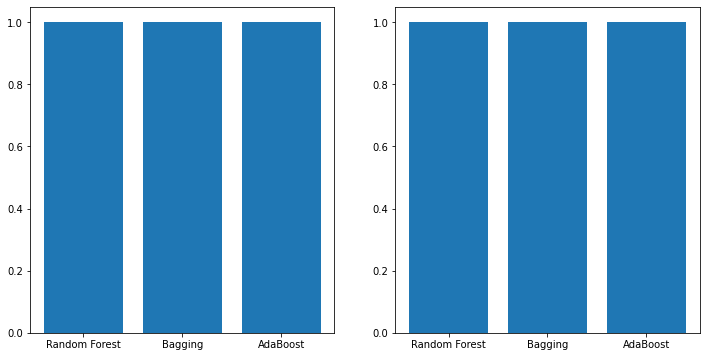

In [76]:
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []
print('Ensemble methods dengan number of trees:', numBaseClassifiers, ' dan max_depth:', maxdepth)
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('rf:', cf)

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('bagging:', cf)
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
cf = confusion_matrix(Y_test, Y_predTest)
print('boosting:', cf)
methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

## Nomor 3
Menggunakan Naive Bayes pada data.

In [77]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


## Nomor 4
Menggunakan ANN dan plot hasil loss dan akurasi untuk masing-masing epoch.

In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.fit_transform(Y_test)
from numpy.random import seed
seed(1)

In [99]:
import tensorflow as tf
#Initialising ANN
ann = tf.keras.models.Sequential()
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
acc_list = []
loss_list = []
for i in range(30):
  ann.fit(X_train,Y_train,batch_size=32,epochs = i+1)
  acc_list.append(float(ann.get_metrics_result()['accuracy']))
  loss_list.append(float(ann.get_metrics_result()['loss']))

2/2 [==============================] - 1s 6ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/2
2/2 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5600
Epoch 2/2
2/2 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5600
Epoch 1/3
2/2 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5600
Epoch 2/3
2/2 [==============================] - 0s 6ms/step - loss: 0.6816 - accuracy: 0.5600
Epoch 3/3
2/2 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5600
Epoch 1/4
2/2 [==============================] - 0s 8ms/step - loss: 0.6739 - accuracy: 0.5600
Epoch 2/4
2/2 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.6200
Epoch 3/4
2/2 [==============================] - 0s 6ms/step - loss: 0.6662 - accuracy: 0.7600
Epoch 4/4
2/2 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.7600
Epoch 1/5
2/2 [==============================] - 0s 7ms/step

Text(0.5, 1.0, 'Accuracy for each epoch')

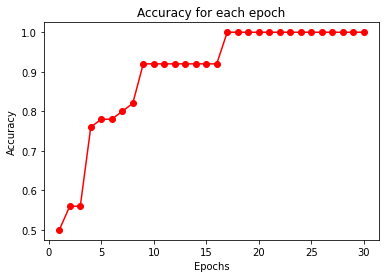

In [100]:
plt.plot([i+1 for i in range(30)], acc_list, 'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for each epoch')

Text(0.5, 1.0, 'Loss for each epoch')

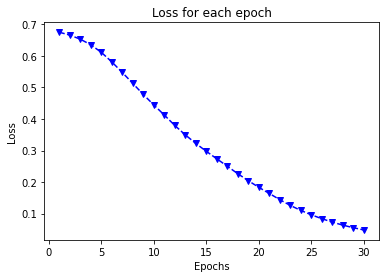

In [88]:
plt.plot([i+1 for i in range(30)], loss_list,'bv--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for each epoch')